In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import curve_fit

тестові дані

In [31]:
np.random.seed(0)
x = np.linspace(1, 10, 50)
y = 3 * np.log(x) + np.random.normal(0, 0.3, size=len(x))

функції

In [32]:
# Лінійні та поліноми
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def quartic(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

# Експоненційні та логарифмічні
def exponential(x, a, b):
    return a * np.exp(b * x)

def exp_plus_linear(x, a, b, c):
    return a * np.exp(b * x) + c * x

def logarithmic(x, a, b):
    return a * np.log(x) + b

def log_plus_linear(x, a, b, c):
    return a * np.log(x) + b * x + c

# Тригонометрія
def sinusoidal(x, a, b, c):
    return a * np.sin(b * x) + c

def cosinusoidal(x, a, b, c):
    return a * np.cos(b * x) + c

def sin_plus_linear(x, a, b, c, d):
    return a * np.sin(b * x) + c * x + d

def sin_plus_cos(x, a, b, c, d):
    return a * np.sin(b * x) + c * np.cos(d * x)

# Гібридні / комбіновані
def linear_plus_exp(x, a, b, c):
    return a * x + b * np.exp(c * x)

def poly2_plus_sin(x, a, b, c, d):
    return a * x**2 + b * x + c * np.sin(d * x)

# Створюємо словник кандидатів
candidates = {
    "Linear": linear,
    "Quadratic": quadratic,
    "Cubic": cubic,
    "Quartic": quartic,
    "Exponential": exponential,
    "Exponential + Linear": exp_plus_linear,
    "Logarithmic": logarithmic,
    "Log + Linear": log_plus_linear,
    "Sinusoidal": sinusoidal,
    "Cosinusoidal": cosinusoidal,
    "Sin + Linear": sin_plus_linear,
    "Sin + Cos": sin_plus_cos,
    "Linear + Exp": linear_plus_exp,
    "Poly2 + Sin": poly2_plus_sin
}

пошук найкращої моделі

In [33]:
results = []
for name, func in candidates.items():
    try:
        popt, _ = curve_fit(func, x, y, maxfev=10000)
        print(f"Fitted {name} with params: {popt}")
        y_pred = func(x, *popt)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        results.append((name, r2, mse, popt))
    except Exception as e:
        results.append((name, -np.inf, np.inf, None))

results.sort(key=lambda t: t[1], reverse=True)

Fitted Linear with params: [0.61362596 1.317255  ]
Fitted Quadratic with params: [-0.0717847   1.40325771 -0.34990812]
Fitted Cubic with params: [ 0.00880301 -0.2170343   2.0908678  -1.20256339]
Fitted Quartic with params: [-1.39341631e-03  3.94581685e-02 -4.44800104e-01  2.74165412e+00
 -1.77004822e+00]
Fitted Exponential with params: [2.34989581 0.11798873]
Fitted Exponential + Linear with params: [-0.22576957  0.32168461  1.18183667]
Fitted Logarithmic with params: [2.78650255 0.37309096]
Fitted Log + Linear with params: [ 2.78846686e+00 -4.68842513e-04  3.72624894e-01]
Fitted Sinusoidal with params: [-0.84541412  1.21323179  4.65445268]
Fitted Cosinusoidal with params: [ 0.83841502 -0.78441887  4.65207728]
Fitted Sin + Linear with params: [-0.50581155  0.8620169   0.61482794  1.40384123]
Fitted Sin + Cos with params: [ 6.56325134  0.16554511 -0.2417706  -0.85853394]
Fitted Linear + Exp with params: [ 1.18183667 -0.22576957  0.32168461]
Fitted Poly2 + Sin with params: [-0.06202368  

Найкраща модель: Log + Linear
Log + Linear | R²=0.967, MSE=0.097, params=[ 2.78846686e+00 -4.68842513e-04  3.72624894e-01]
Logarithmic | R²=0.967, MSE=0.097, params=[2.78650255 0.37309096]
Quartic    | R²=0.967, MSE=0.097, params=[-1.39341631e-03  3.94581685e-02 -4.44800104e-01  2.74165412e+00
 -1.77004822e+00]
Cubic      | R²=0.966, MSE=0.099, params=[ 0.00880301 -0.2170343   2.0908678  -1.20256339]
Sin + Cos  | R²=0.964, MSE=0.106, params=[ 6.56325134  0.16554511 -0.2417706  -0.85853394]
Poly2 + Sin | R²=0.962, MSE=0.114, params=[-0.06202368  1.27720974 -0.12958394  1.09201502]
Quadratic  | R²=0.961, MSE=0.116, params=[-0.0717847   1.40325771 -0.34990812]
Exponential + Linear | R²=0.940, MSE=0.178, params=[-0.22576957  0.32168461  1.18183667]
Linear + Exp | R²=0.940, MSE=0.178, params=[ 1.18183667 -0.22576957  0.32168461]
Sin + Linear | R²=0.938, MSE=0.184, params=[-0.50581155  0.8620169   0.61482794  1.40384123]
Linear     | R²=0.892, MSE=0.319, params=[0.61362596 1.317255  ]
Expone

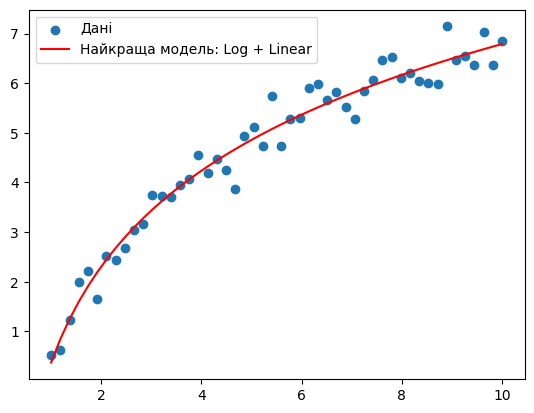

In [34]:
print("Найкраща модель:", results[0][0])
for name, r2, mse, params in results:
    print(f"{name:10s} | R²={r2:.3f}, MSE={mse:.3f}, params={params}")

# --- графік ---
best_name, _, _, best_params = results[0]
best_func = candidates[best_name]
plt.scatter(x, y, label="Дані")
plt.plot(x, best_func(x, *best_params), color="red", label=f"Найкраща модель: {best_name}")
plt.legend()
plt.show()

In [35]:
x_new = np.array([1, 2, 3, 4, 5])
y_pred = best_func(x_new, *best_params) 
y_pred

array([0.37215605, 2.30450515, 3.43466232, 4.2363854 , 4.85814496])

# розклад по Фурьє

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV

### сезонні

In [40]:
class FourierRegressorCV(BaseEstimator, RegressorMixin):
    def __init__(self, n_freqs=3):
        """
        Fourier Regressor з можливістю підбору кількості гармонік через CV.
        n_freqs : int
            Початкова кількість гармонік (можна змінювати через GridSearchCV)
        """
        self.n_freqs = n_freqs
        self.freqs_ = None
        self.model_ = LinearRegression()

    def _generate_fourier_features(self, x, freqs):
        X = []
        for f in freqs:
            X.append(np.sin(2 * np.pi * f * x))
            X.append(np.cos(2 * np.pi * f * x))
        return np.column_stack(X)

    def fit(self, x, y):
        x = np.asarray(x).ravel()
        y = np.asarray(y).ravel()
        n = len(x)

        # FFT для визначення топ частот
        yf = rfft(y)
        xf = rfftfreq(n, x[1] - x[0])
        amplitude = np.abs(yf)

        top_idx = np.argsort(amplitude)[-self.n_freqs:]
        self.freqs_ = xf[top_idx]

        X_features = self._generate_fourier_features(x, self.freqs_)
        self.model_.fit(X_features, y)
        return self

    def predict(self, x):
        x = np.asarray(x).ravel()
        if self.freqs_ is None:
            raise ValueError("Спочатку викличте fit()")
        X_features = self._generate_fourier_features(x, self.freqs_)
        return self.model_.predict(X_features)

In [ ]:
# Дані
x = np.linspace(0, 10, 100)
y = 3*np.sin(2*np.pi*0.5*x) + 2*np.cos(2*np.pi*1.5*x) + np.random.normal(0, 0.2, 100)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

# Модель
model = FourierRegressorCV()

# Пошук оптимальної кількості гармонік
param_grid = {'n_freqs': [1, 2, 3, 4, 5]}
grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

print("Оптимальна кількість гармонік:", grid.best_params_)
y_pred = grid.best_estimator_.predict(x_test)

Оптимальна кількість гармонік: {'n_freqs': 3}


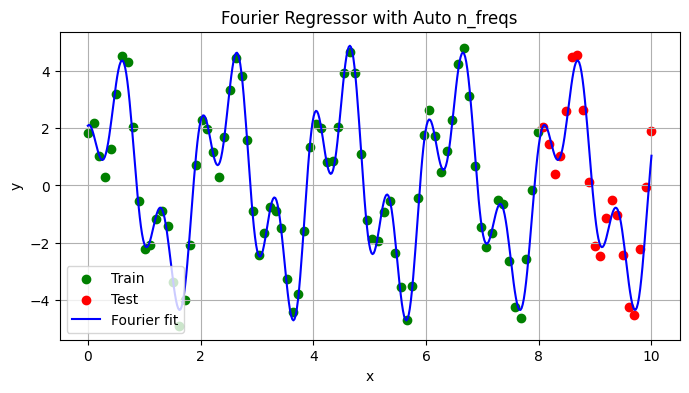

In [42]:
x_full = np.linspace(0, 10, 500)
y_full = grid.best_estimator_.predict(x_full)

plt.figure(figsize=(8,4))
plt.scatter(x_train, y_train, color='green', label="Train")
plt.scatter(x_test, y_test, color='red', label="Test")
plt.plot(x_full, y_full, color='blue', label="Fourier fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fourier Regressor with Auto n_freqs")
plt.legend()
plt.grid(True)
plt.show()